In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from os.path import join
from IPython.display import display, Image

In [7]:
# 경로 설정
path_to_current = os.getcwd()
path_to_dataset = join(path_to_current, 'open')
print(f'{path_to_current = }')

df = pd.read_csv(join(path_to_dataset, 'train_df.csv'),index_col = 0)

path_to_current = 'e:\\VSCodeProjects\\DACON_Anomoly_Detection'


In [6]:
df

file_name       class state            label
index                                              
0      10000.png  transistor  good  transistor-good
1      10001.png     capsule  good     capsule-good
2      10002.png  transistor  good  transistor-good
3      10003.png        wood  good        wood-good
4      10004.png      bottle  good      bottle-good
...          ...         ...   ...              ...
4272   14272.png  transistor  good  transistor-good
4273   14273.png  transistor  good  transistor-good
4274   14274.png        grid  good        grid-good
4275   14275.png      zipper  good      zipper-good
4276   14276.png       screw  good       screw-good

[4277 rows x 4 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4277 entries, 0 to 4276
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  4277 non-null   object
 1   class      4277 non-null   object
 2   state      4277 non-null   object
 3   label      4277 non-null   object
dtypes: object(4)
memory usage: 167.1+ KB


In [10]:
df.describe()

file_name     class state          label
count        4277      4277  4277           4277
unique       4277        15    49             88
top     10000.png  hazelnut  good  hazelnut-good
freq            1       427  3629            391

In [11]:
df.isnull().sum()

file_name    0
class        0
state        0
label        0
dtype: int64

In [25]:
df['class'].value_counts()  # df.class -> syntax error

hazelnut      427
screw         381
pill          340
carpet        327
zipper        301
grid          294
leather       293
wood          278
capsule       275
tile          273
cable         271
metal_nut     268
bottle        241
transistor    233
toothbrush     75
Name: class, dtype: int64

In [26]:
df['state'].value_counts()

good                    3629
color                     48
scratch                   47
crack                     43
combined                  29
cut                       28
hole                      23
contamination             22
faulty_imprint            21
poke                      20
bent                      19
rough                     17
glue                      16
thread                    16
defective                 15
metal_contamination       15
scratch_neck              13
scratch_head              12
thread_side               12
manipulated_front         12
flip                      12
thread_top                12
broken_small              11
squeeze                   10
broken_large              10
broken_teeth              10
fabric_border              9
fold                       9
print                      9
oil                        9
split_teeth                9
glue_strip                 9
squeezed_teeth             8
gray_stroke                8
fabric_interio

In [11]:
df['label'].value_counts()

hazelnut-good                 391
screw-good                    320
carpet-good                   280
pill-good                     267
grid-good                     264
                             ... 
transistor-bent_lead            5
transistor-damaged_case         5
cable-cut_outer_insulation      5
wood-liquid                     5
wood-color                      4
Name: label, Length: 88, dtype: int64

In [12]:
df['label'].value_counts().index

Index(['hazelnut-good', 'screw-good', 'carpet-good', 'pill-good', 'grid-good',
       'wood-good', 'leather-good', 'zipper-good', 'tile-good', 'cable-good',
       'metal_nut-good', 'capsule-good', 'transistor-good', 'bottle-good',
       'toothbrush-good', 'toothbrush-defective', 'pill-color',
       'screw-scratch_neck', 'metal_nut-bent', 'pill-crack',
       'screw-manipulated_front', 'capsule-scratch', 'metal_nut-flip',
       'capsule-crack', 'screw-thread_top', 'metal_nut-scratch',
       'screw-scratch_head', 'screw-thread_side', 'pill-scratch',
       'pill-contamination', 'bottle-broken_small', 'bottle-contamination',
       'capsule-poke', 'metal_nut-color', 'capsule-faulty_imprint',
       'wood-scratch', 'leather-color', 'leather-glue', 'leather-cut',
       'bottle-broken_large', 'pill-faulty_imprint', 'carpet-color',
       'zipper-broken_teeth', 'capsule-squeeze', 'carpet-thread', 'carpet-cut',
       'leather-poke', 'tile-crack', 'pill-combined', 'hazelnut-hole',
      

### Pie 그래프로 시작화

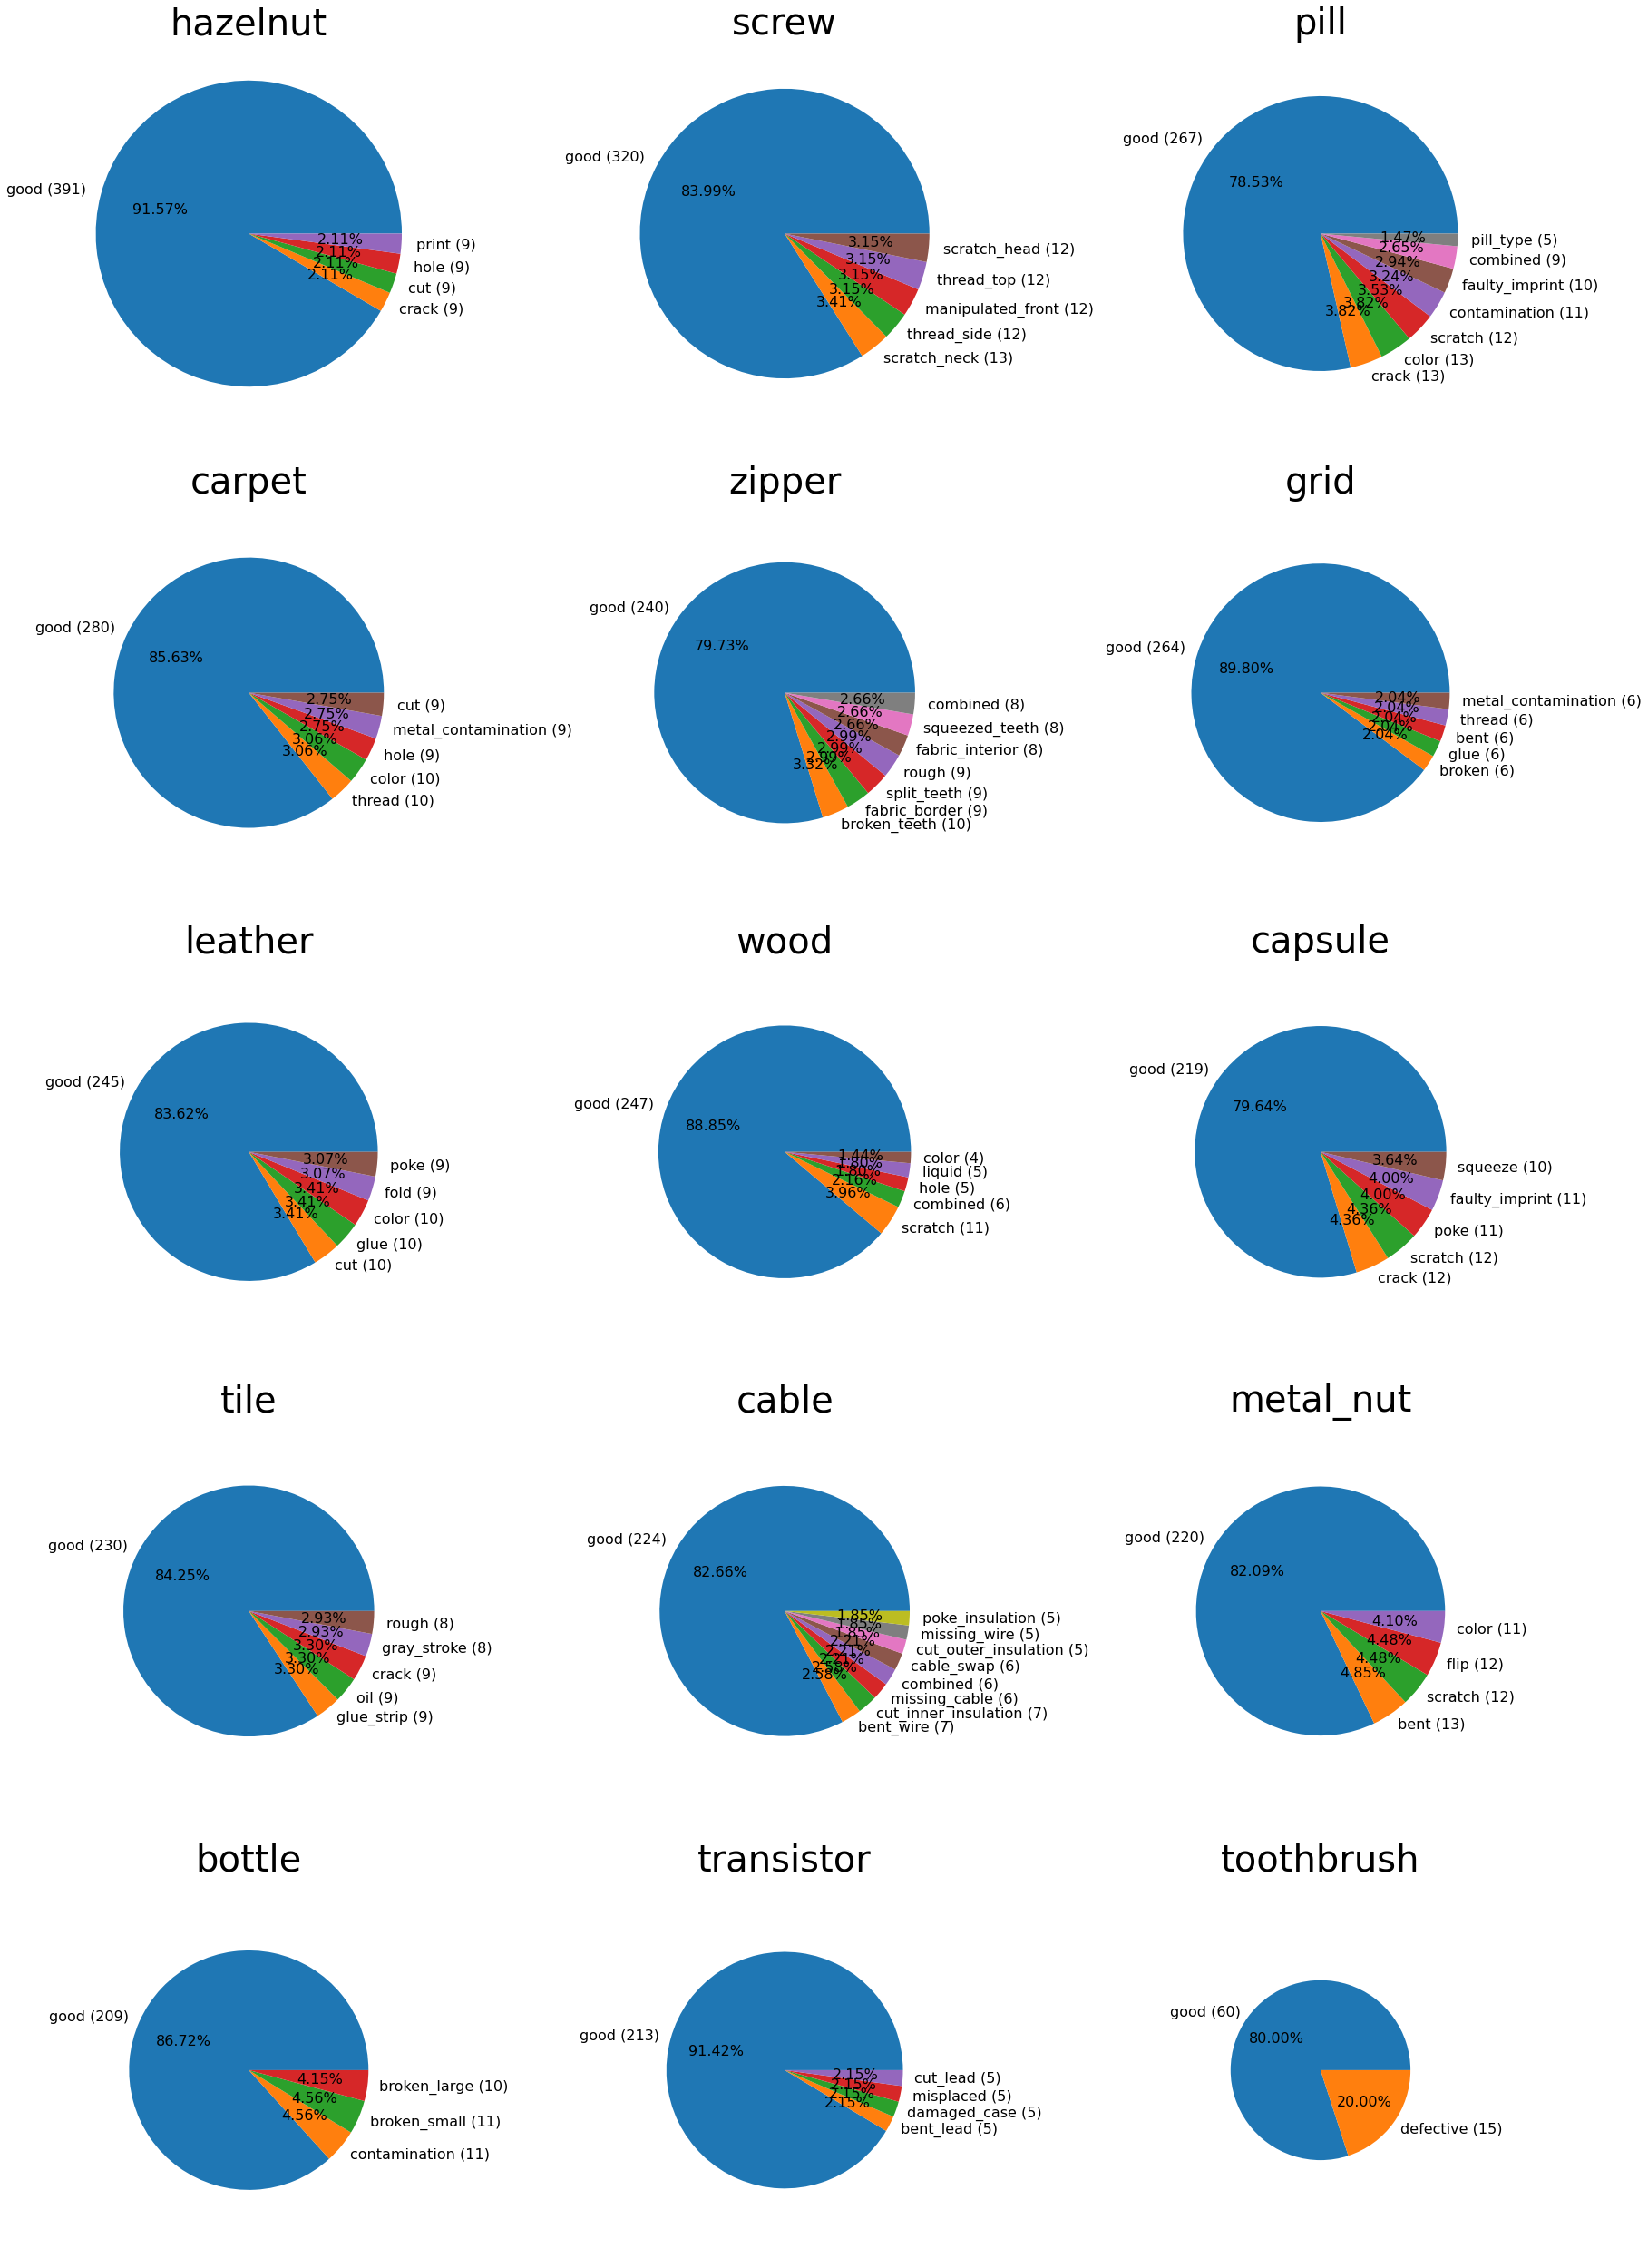

In [26]:
# 종류
items = list(df['class'].value_counts().index)
counts = df['class'].value_counts()

# Pie 그래프
num_col = 3
num_row = np.ceil(len(items) // num_col).astype(np.int64)
fig, axes = plt.subplots(num_row, num_col, facecolor='white', figsize=(num_col*10, num_row*9))

for i, item in enumerate(items):
    ax = axes.ravel()[i]
    mask = df.label.str.contains(item)
    sr = df.label[mask].value_counts()
    labels = [f"{idx.split('-')[-1]} ({val})" for idx, val in sr.items()]
    ax.pie(x=sr, labels=labels, autopct='%.2f%%', textprops={'fontsize': 16},
           radius=counts[item]/(counts.max()*2) + .5)   # 반지름 0.5 ~ 1로 조정
    ax.set_title(item, size=40)
    
plt.show()

### class별 상태 이미지 확인

In [47]:
# class별 상태 종류 수
num_state = {}
for item in items:
    mask = (df['class'] == item)
    df_item = df.state[mask]
    num_state[item] = len(df_item.unique())

print(num_state)

{'hazelnut': 5, 'screw': 6, 'pill': 8, 'carpet': 6, 'zipper': 8, 'grid': 6, 'leather': 6, 'wood': 6, 'capsule': 6, 'tile': 6, 'cable': 9, 'metal_nut': 5, 'bottle': 4, 'transistor': 5, 'toothbrush': 2}


rows X columns: 15 X 9


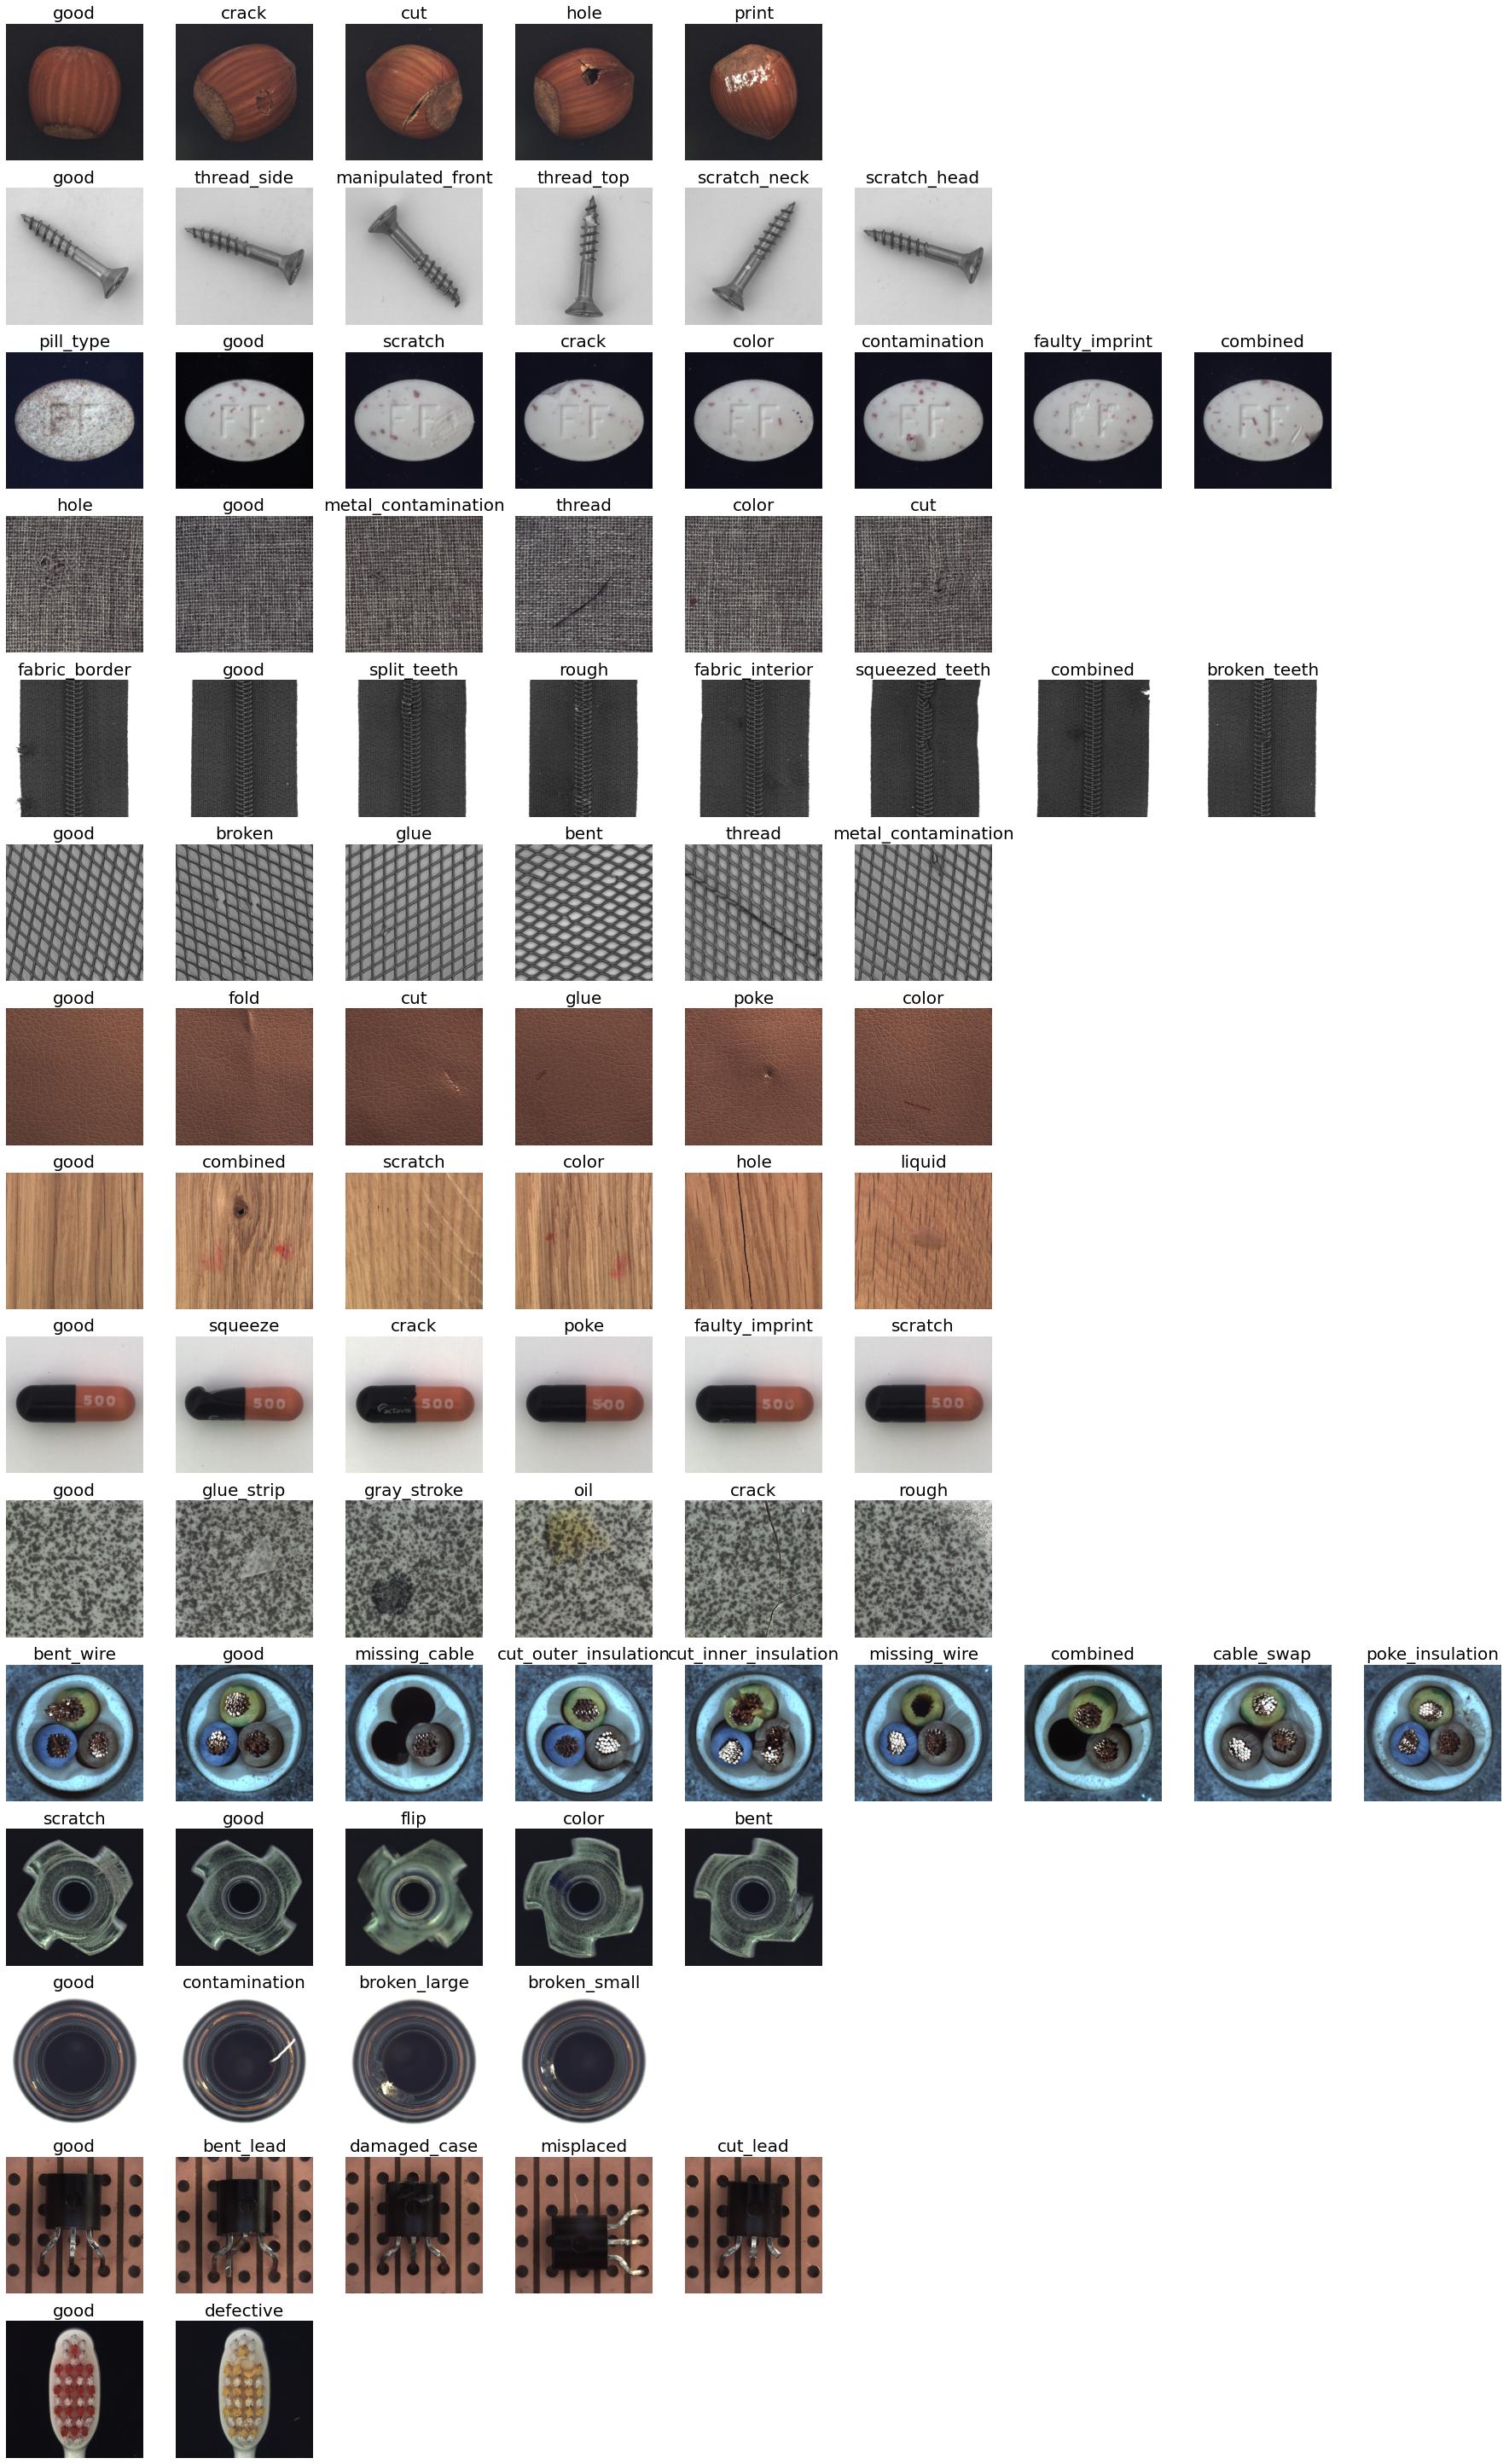

In [81]:
rows = len(items)
columns = max(num_state.values())
print(f'rows X columns: {rows} X {columns}')

fig, axes = plt.subplots(rows, columns, facecolor='white', figsize=(columns * 3.5, rows * 3.5))

[ax.axis('off') for ax in axes.ravel()] # 축 제거

for i, item in enumerate(items):
    mask = (df['class'] == item)
    df_item = df[mask]
    for j, state in enumerate(df_item.state.unique()):
        # 샘플 랜덤 출력
        mask = df_item.state.str.contains(state)
        sample = df_item[mask].sample(1)   
        filename = sample.file_name.values[0]
        
        # 이미지 입력
        img = cv2.imread(join(path_to_dataset, 'train', filename))
        axes[i, j].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axes[i, j].set_title(state, size=20) # 제목 추가
plt.show()